**Anurag Choudhury**

**202318059**

#Data Exploration (EDA)

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/ass/diabetes.csv')

# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
print("\nColumns in the dataset:", df.columns)
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Descriptive statistics
print("\nDescriptive statistics for numerical variables:")
print(df.describe())


Shape of the dataset: (768, 9)

Columns in the dataset: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Data types of each column:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Descriptive statistics for numerical variables:
       Pregnancies     Glucose  BloodPressure  SkinTh

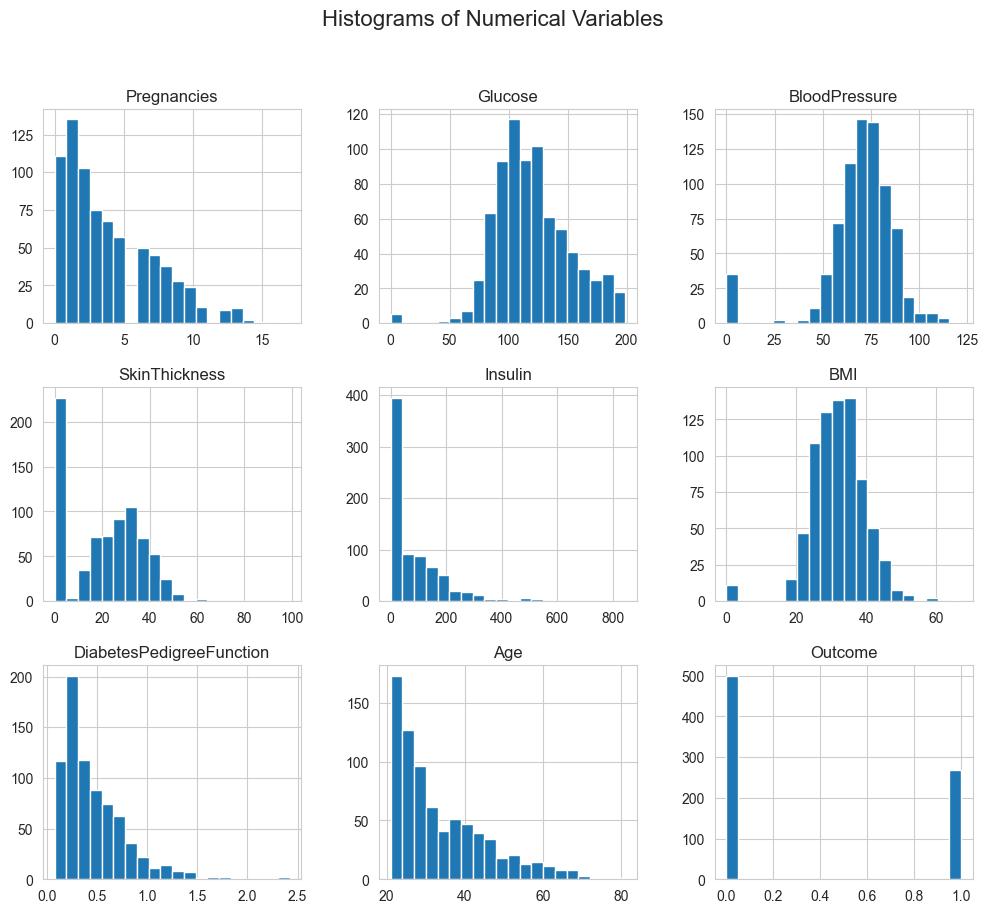

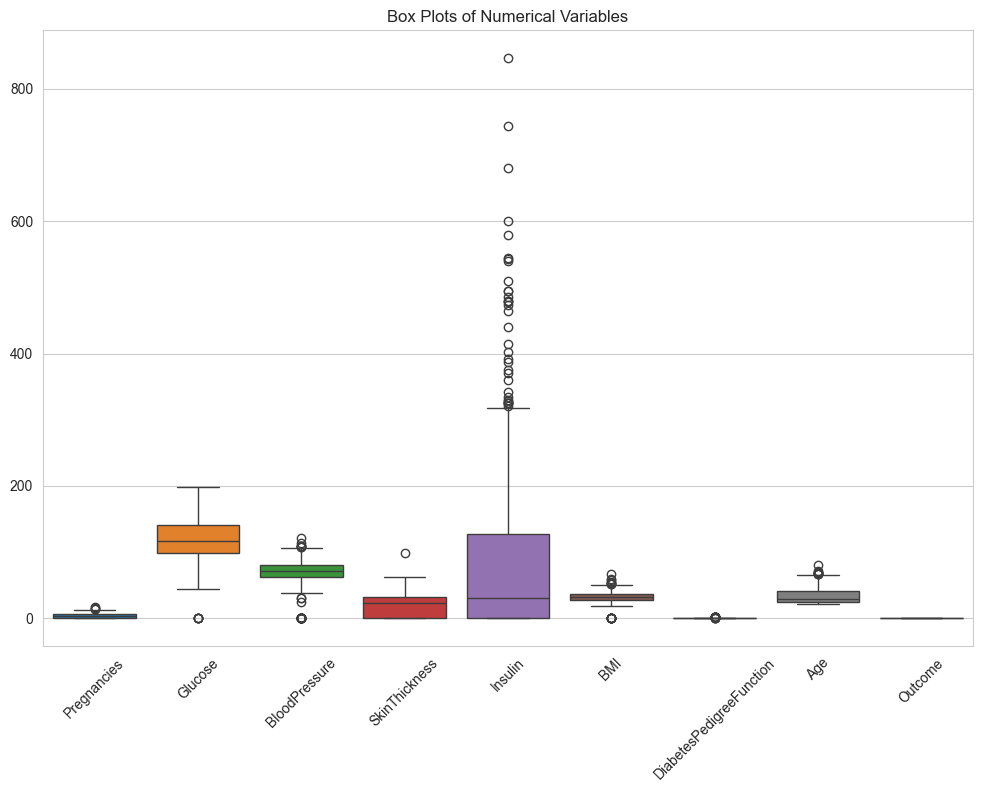

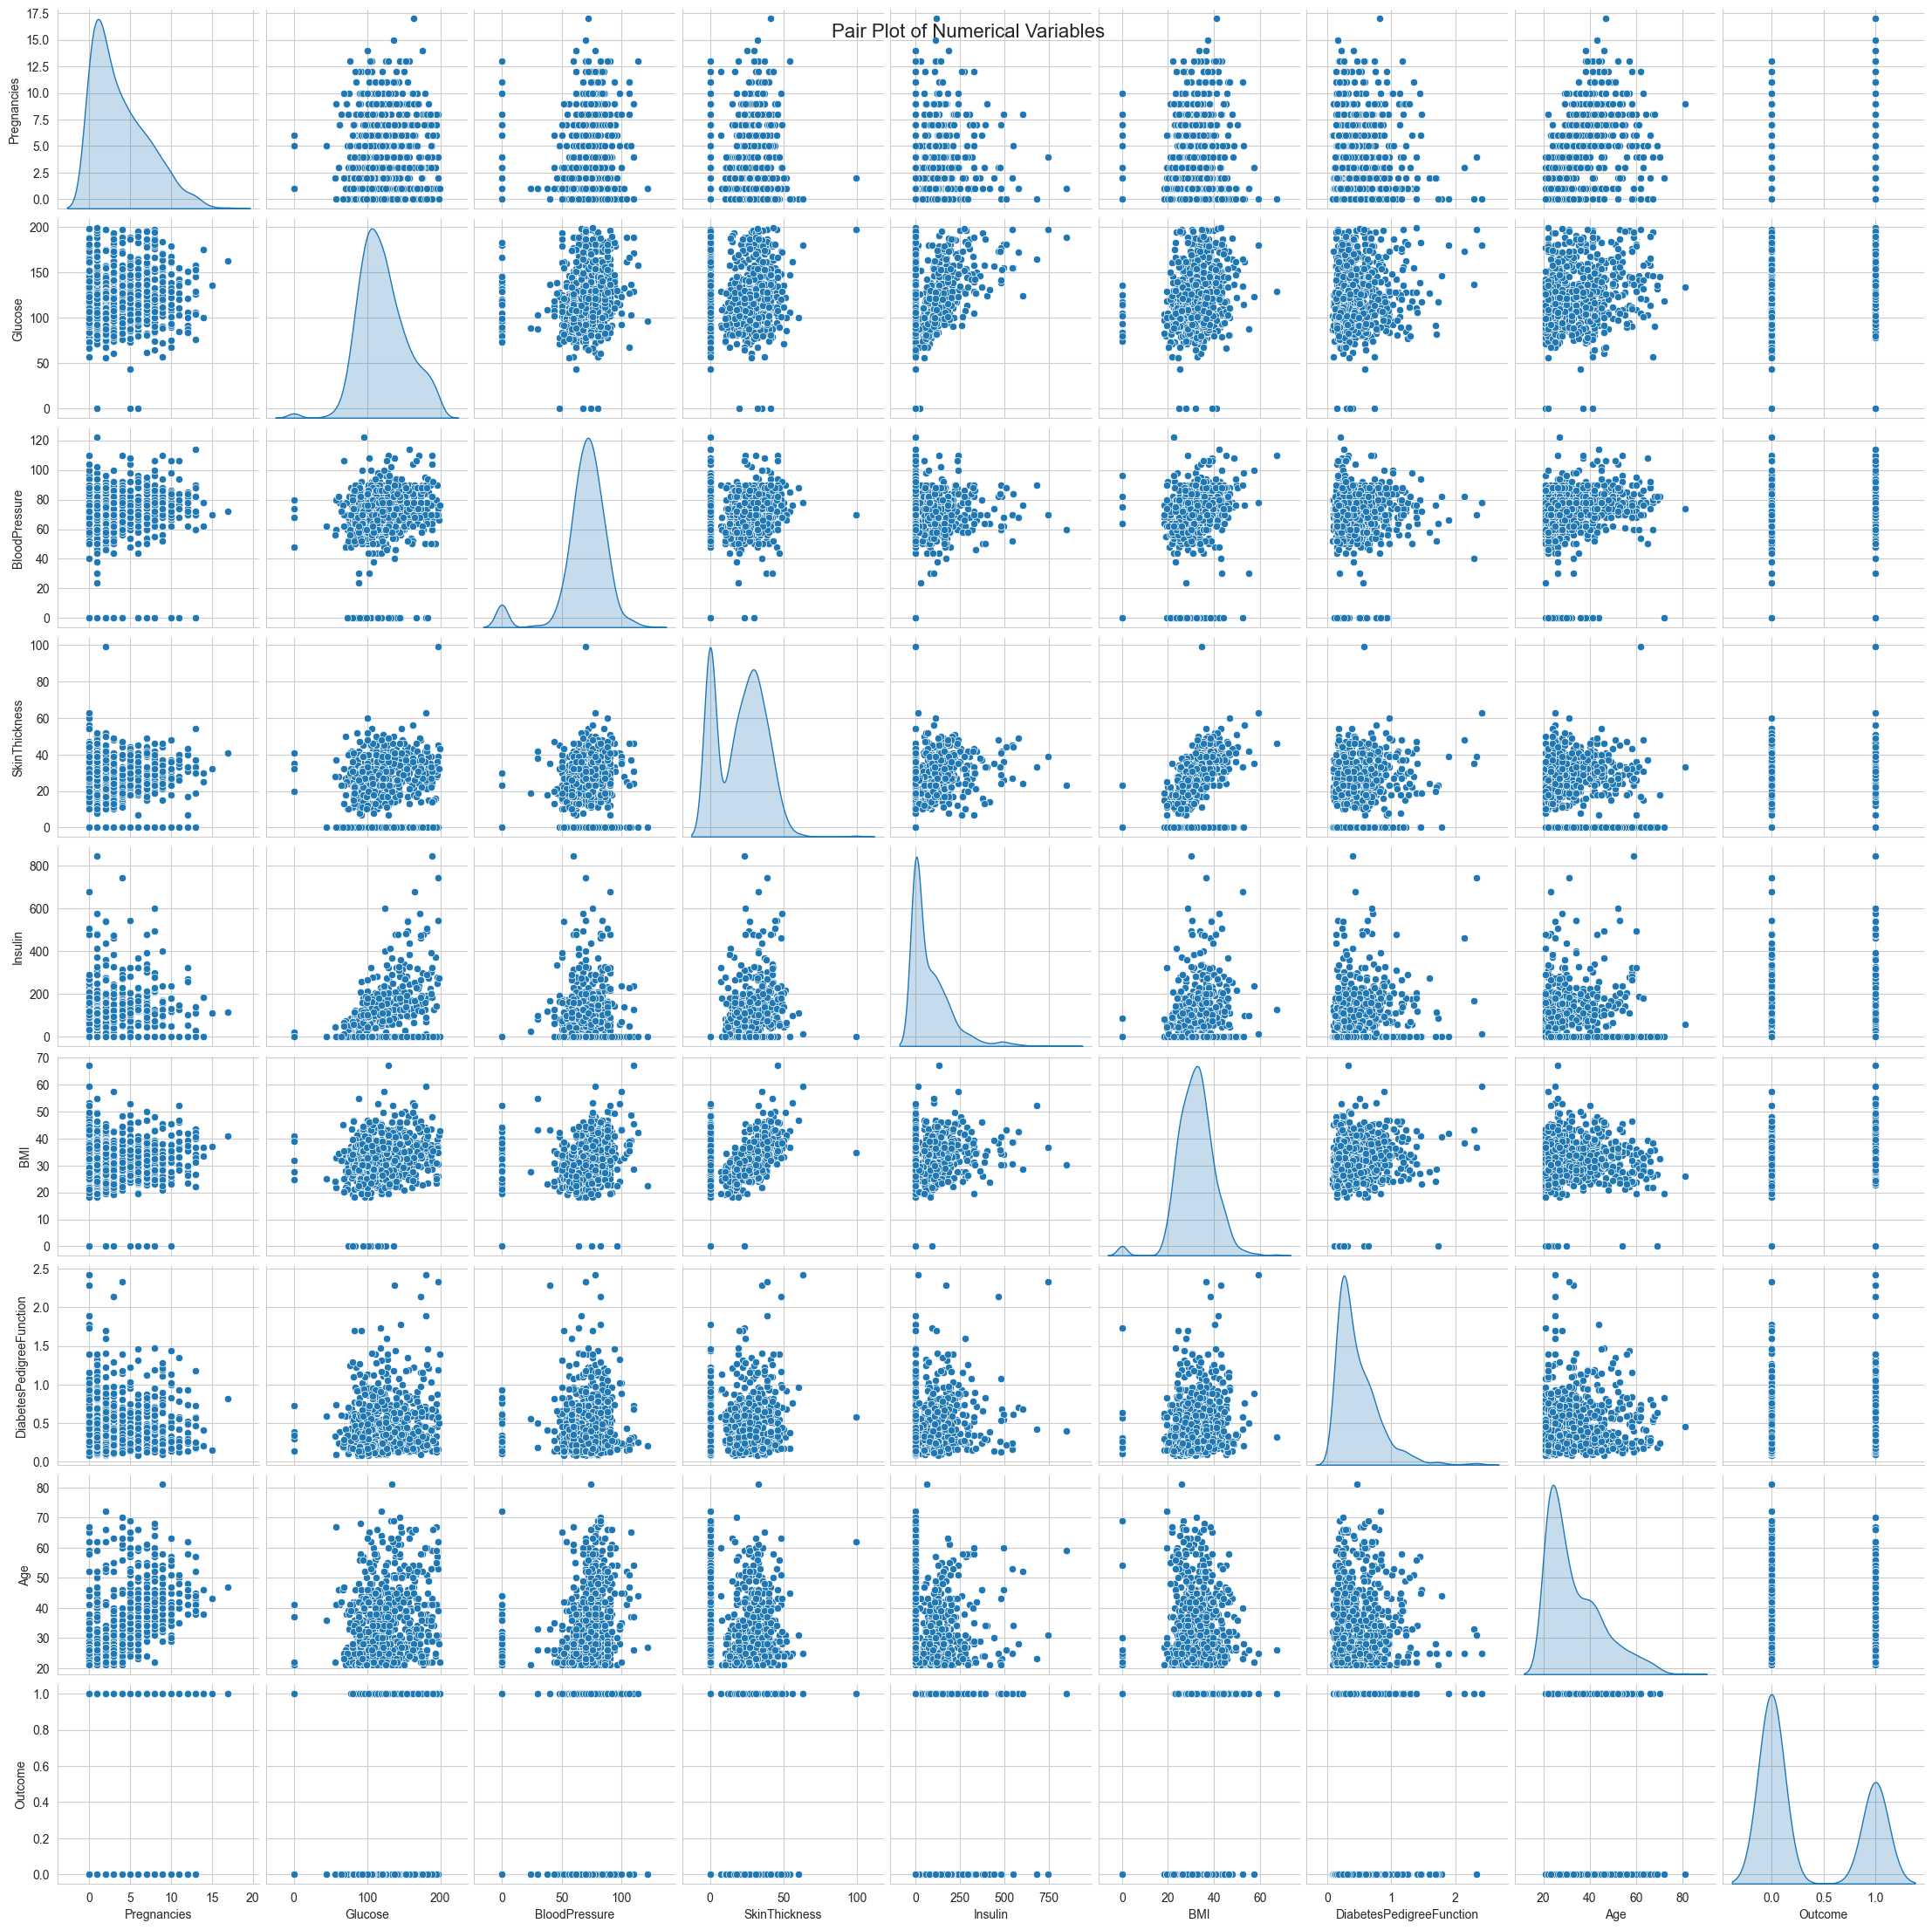

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Plot histograms for each numerical variable
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()

# Plot box plots for each numerical variable
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plots of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

# Plot pair plot to visualize relationships between features
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables', fontsize=16)
plt.show()


#Data Preprocessesing

In [ ]:
print("missing values before handling\n")
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values,'\n')
# Impute missing values with the mean
df.fillna(df.mean(), inplace=True)
# Remove rows with missing values
df.dropna(inplace=True)
# Verify missing values have been handled
missing_values_after_handling = df.isnull().sum()
print("missing values after handling\n")
print(missing_values_after_handling)


missing values before handling

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64 

missing values after handling

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the features using MinMaxScaler
scaled_features = scaler.fit_transform(df)

# Convert scaled features back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)
# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features using StandardScaler
scaled_features = scaler.fit_transform(df)

# Convert scaled features back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)


In [ ]:
# Assuming 'df' is the DataFrame containing categorical variables
encoded_df = pd.get_dummies(df)
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform all columns in the dataset
encoded_features = encoder.fit_transform(df)

# Convert encoded features to DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(df.columns)) # type: ignore

#Feature Engineering

In [ ]:
import math
import numpy as np
df['BMI_Age'] = df['BMI'] * df['Age']  # Product of BMI and Age
df['Insulin_Glucose'] = df['Insulin'] * df['Glucose']  # Product of Insulin and Glucose
df['Glucose_Squared'] = df['Glucose'] ** 2
df['Pregnancy_Insulin'] = df['Pregnancies'] * df['Insulin']
df['Glucose_Age'] = df['Glucose'] * df['Age']
df['BMI_Pregnancy'] = df['BMI'] * df['Pregnancies']
df['BloodPressure_Glucose'] = df['BloodPressure'] * df['Glucose']
df['SkinThickness_Age'] = df['SkinThickness'] * df['Age']
df['Insulin_BMI'] = df['Insulin'] * df['BMI']
df['Glucose_LogBMI'] = df['Glucose'] * df['BMI'].apply(lambda x: 0 if x == 0 else math.log(x))
df['Age_LogInsulin'] = df['Age'] * df['Insulin'].apply(lambda x: 0 if x == 0 else math.log(x))
df['BloodPressure_BMI'] = df['BloodPressure'] * df['BMI']
df['Glucose_BMI_Age'] = df['Glucose'] * df['BMI'] * df['Age']
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  BMI_Age  ...  Pregnancy_Insulin  \
0                     0.627   50        1   1680.0  ...                  0   
1                     0.351   31        0    824.6  ...                  0   
2                     0.672   32        1    745.6  ...                  0   
3                     0.167   21        0    590.1  ...                 94   
4                     2.288   33        1   1422.3  ...                  0   

   Glucose_Age  BMI_Pregnancy  BloodPressure_Glucose  SkinThickness_Age  \
0         7400         

In [ ]:
import numpy as np

# Log transformation with small constant added to avoid divide by zero
df['Log_Glucose'] = np.log(df['Glucose'] + 1)
df['Log_BMI'] = np.log(df['BMI'] + 1)
df['Log_Age'] = np.log(df['Age'] + 1)

# Square root transformation
df['Sqrt_Insulin'] = np.sqrt(df['Insulin'])
df['Sqrt_BloodPressure'] = np.sqrt(df['BloodPressure'])

# Reciprocal transformation (with small constant added to avoid divide by zero)
df['Reciprocal_SkinThickness'] = 1 / (df['SkinThickness'] + 1)
df['Reciprocal_Pregnancies'] = 1 / (df['Pregnancies'] + 1)

# Display the updated dataframe
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  BMI_Age  ...  Age_LogInsulin  \
0                     0.627   50        1   1680.0  ...        0.000000   
1                     0.351   31        0    824.6  ...        0.000000   
2                     0.672   32        1    745.6  ...        0.000000   
3                     0.167   21        0    590.1  ...       95.409190   
4                     2.288   33        1   1422.3  ...      169.090811   

   BloodPressure_BMI  Glucose_BMI_Age  Log_Glucose   Log_BMI   Log_Age  \
0             2419.2         248640.0     

#Feature Scaling

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Sort the correlation values with respect to the target variable (diabetes)
correlation_with_diabetes = correlation_matrix['Outcome'].sort_values(ascending=False)

print("Correlation of features with the target variable (diabetes):")
print(correlation_with_diabetes)


Correlation of features with the target variable (diabetes):
Outcome                     1.000000
Glucose_Squared             0.483739
Glucose_LogBMI              0.476987
Glucose_BMI_Age             0.473705
Glucose                     0.466581
Glucose_Age                 0.401283
BMI_Age                     0.357727
BloodPressure_Glucose       0.333256
BMI                         0.292695
Log_Age                     0.274247
BMI_Pregnancy               0.267414
Log_Glucose                 0.253576
Age                         0.238356
Pregnancies                 0.221898
Pregnancy_Insulin           0.208333
BloodPressure_BMI           0.207922
Log_BMI                     0.179640
Insulin_Glucose             0.177786
DiabetesPedigreeFunction    0.173844
SkinThickness_Age           0.170203
Insulin_BMI                 0.147407
Insulin                     0.130548
Age_LogInsulin              0.116122
SkinThickness               0.074752
Sqrt_Insulin                0.072343
BloodPressure 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target variable (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a dataframe to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature importance ranking:")
print(feature_importance_df)


Feature importance ranking:
                     Feature  Importance
17            Glucose_LogBMI    0.105263
20           Glucose_BMI_Age    0.076680
12               Glucose_Age    0.075056
21               Log_Glucose    0.060847
1                    Glucose    0.055112
10           Glucose_Squared    0.050425
6   DiabetesPedigreeFunction    0.048519
8                    BMI_Age    0.047679
5                        BMI    0.046217
22                   Log_BMI    0.045920
14     BloodPressure_Glucose    0.042011
19         BloodPressure_BMI    0.033104
7                        Age    0.030842
23                   Log_Age    0.029831
13             BMI_Pregnancy    0.028952
25        Sqrt_BloodPressure    0.027146
2              BloodPressure    0.024908
15         SkinThickness_Age    0.020212
0                Pregnancies    0.020087
27    Reciprocal_Pregnancies    0.017654
18            Age_LogInsulin    0.017098
16               Insulin_BMI    0.016926
11         Pregnancy_Insulin 

#Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
# Logistic Regression with a different solver
logistic_regression = LogisticRegression(solver='saga', max_iter=10000)
logistic_regression.fit(X_train, y_train)
logistic_regression_pred = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_pred)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_regression_pred))


# Polynomial Logistic Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_logistic_regression = LogisticRegression(solver='saga', max_iter=10000)
poly_logistic_regression.fit(X_train_poly, y_train)
poly_logistic_regression_pred = poly_logistic_regression.predict(X_test_poly)
poly_logistic_regression_accuracy = accuracy_score(y_test, poly_logistic_regression_pred)
print("Polynomial Logistic Regression (degree=2) Accuracy:", poly_logistic_regression_accuracy)
print("Polynomial Logistic Regression (degree=2) Classification Report:")
print(classification_report(y_test, poly_logistic_regression_pred))

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
print("Random Forest Classifier Accuracy:", random_forest_accuracy)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, random_forest_pred))

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Support Vector Machine (SVM) Classification Report:")
print(classification_report(y_test, svm_pred))

# k-nearest neighbors (kNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("k-nearest neighbors (kNN) Accuracy:", knn_accuracy)
print("k-nearest neighbors (kNN) Classification Report:")
print(classification_report(y_test, knn_pred))


Logistic Regression Accuracy: 0.7402597402597403
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        99
           1       0.65      0.60      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154

Polynomial Logistic Regression (degree=2) Accuracy: 0.7077922077922078
Polynomial Logistic Regression (degree=2) Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

Random Forest Classifier Accuracy: 0.7402597402597403
Random Forest Classifier Classification Report:
              pr

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scipy.stats import uniform
# Define the pipeline with preprocessing steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('pca', PCA()),  # Reduce dimensionality with PCA
    ('logistic', LogisticRegression(max_iter=1000))  # Logistic regression model
])

# Define hyperparameters grid for grid search
param_grid = {
    'pca__n_components': [None, 5, 10, 15],  # Number of PCA components
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'logistic__solver': ['lbfgs', 'liblinear'],  # Solver for logistic regression
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
test_score = grid_search.score(X_test, y_test)
print("Test set score:", test_score)
param_dist = {
    'pca__n_components': [None, 5, 10, 15],  # Number of PCA components
    'logistic__C': uniform(0.001, 100),  # Regularization parameter
    'logistic__solver': ['lbfgs', 'liblinear'],  # Solver for logistic regression
}

# Perform randomized search
random_search = RandomizedSearchCV(pipeline, param_dist, cv=5, n_iter=20, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Evaluate on test set
test_score = random_search.score(X_test, y_test)
print("Test set score:", test_score)

Best parameters: {'logistic__C': 1, 'logistic__solver': 'liblinear', 'pca__n_components': None}
Best cross-validation score: 0.7703585232573638
Test set score: 0.7402597402597403
Best parameters: {'logistic__C': 5.809361216819947, 'logistic__solver': 'liblinear', 'pca__n_components': None}
Best cross-validation score: 0.7687058509929362
Test set score: 0.7402597402597403
